In [2]:
import numpy as np
import pandas as pds
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
large=22;med=16;small=12

In [4]:
params = { 'axes.titlesize':large,
          'legend.fontsize':med,
          'figure.figsize':(16,10),
          'axes.labelsize':med,
          'axes.titlesize':med,
          'xtick.labelsize':med,
          'ytick.labelsize':med,
          'figure.titlesize':large }

In [5]:
plt.rcParams.update(params)

In [6]:
plt.style.use('seaborn-whitegrid')

In [7]:
sns.set_style("white")
%matplotlib inline

In [11]:
print(mpl.__version__)
print(sns.__version__)

3.0.3
0.9.0


In [12]:
midwest=pds.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

In [13]:
# scatter plot 
# Import dataset
# Prepare Data
# Create as many colors as there are unique midwest['category']
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [16]:
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
#cm is the color map library in mpl
#each category has its own color

In [28]:
# Draw Plot for Each Category

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

<Figure size 1280x800 with 0 Axes>

<Figure size 1280x800 with 0 Axes>

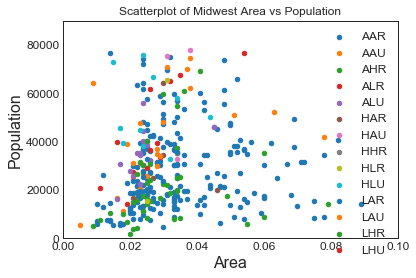

In [29]:
for i, category in enumerate(categories):

    plt.scatter('area', 'poptotal',

                data=midwest.loc[midwest.category==category, :],

                s=20, cmap=colors[i], label=str(category))

# Decorations

plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),

              xlabel='Area', ylabel='Population')



plt.xticks(fontsize=12); plt.yticks(fontsize=12)

plt.title("Scatterplot of Midwest Area vs Population", fontsize=12)

plt.legend(fontsize=12)    

plt.show() 

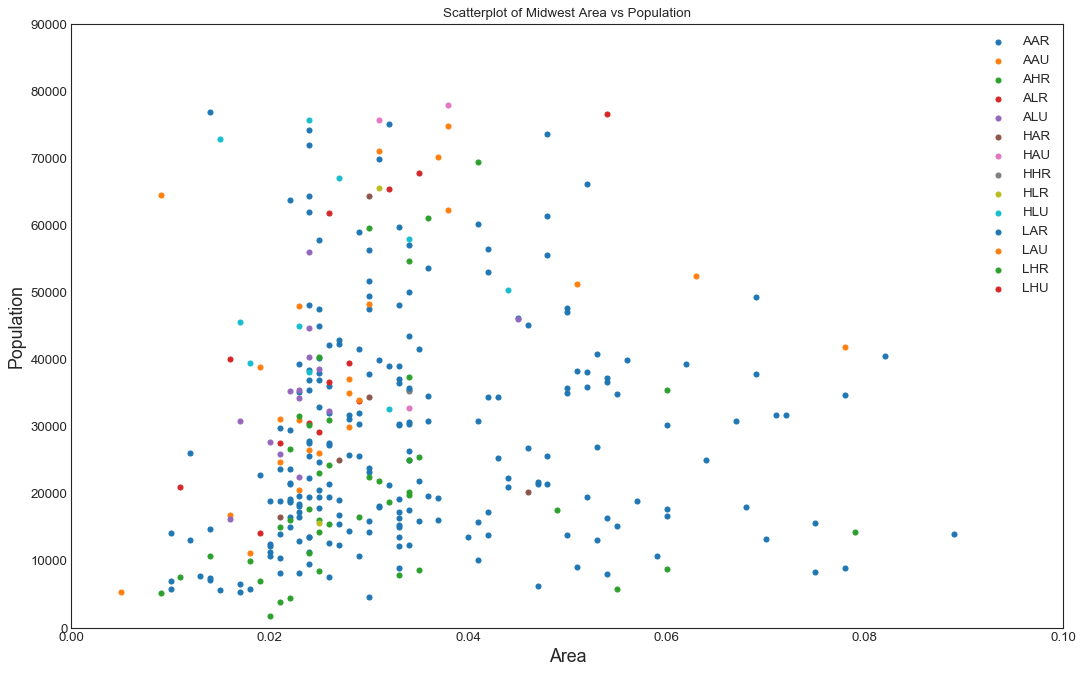

In [27]:
# Draw Plot for Each Category

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):

    plt.scatter('area', 'poptotal',

                data=midwest.loc[midwest.category==category, :],

                s=20, cmap=colors[i], label=str(category))

# Decorations

plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),

              xlabel='Area', ylabel='Population')



plt.xticks(fontsize=12); plt.yticks(fontsize=12)

plt.title("Scatterplot of Midwest Area vs Population", fontsize=12)

plt.legend(fontsize=12)    

plt.show() 
#所有plt的参数设置最好放一个框内 否则画的图会不一样 特别是plt.figure定义的区域大小 例子如上

In [25]:
from matplotlib import patches

from scipy.spatial import ConvexHull

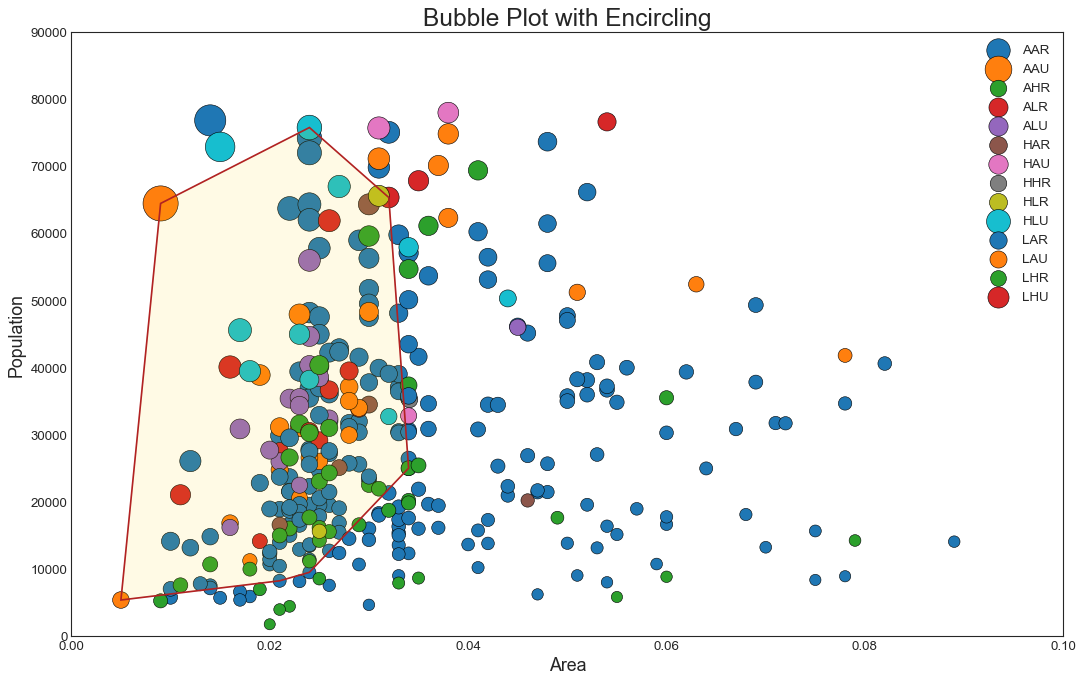

In [30]:
# Bubble plot with Encircling
# Step 2: Draw Scatterplot with unique color for each category

fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    



for i, category in enumerate(categories):

    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :],

                s='dot_size', cmap=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling

# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot

def encircle(x,y, ax=None, **kw):

    if not ax: ax=plt.gca()

    p = np.c_[x,y]

    hull = ConvexHull(p)

    poly = plt.Polygon(p[hull.vertices,:], **kw)

    ax.add_patch(poly)



# Select data to be encircled

midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         



# Draw polygon surrounding vertices    

encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)

encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)



# Step 4: Decorations

plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),

              xlabel='Area', ylabel='Population')



plt.xticks(fontsize=12); plt.yticks(fontsize=12)

plt.title("Bubble Plot with Encircling", fontsize=22)

plt.legend(fontsize=12)    

plt.show()    

In [32]:
# Scatter plot with linear regression line of best fit
# Import Data

df = pds.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


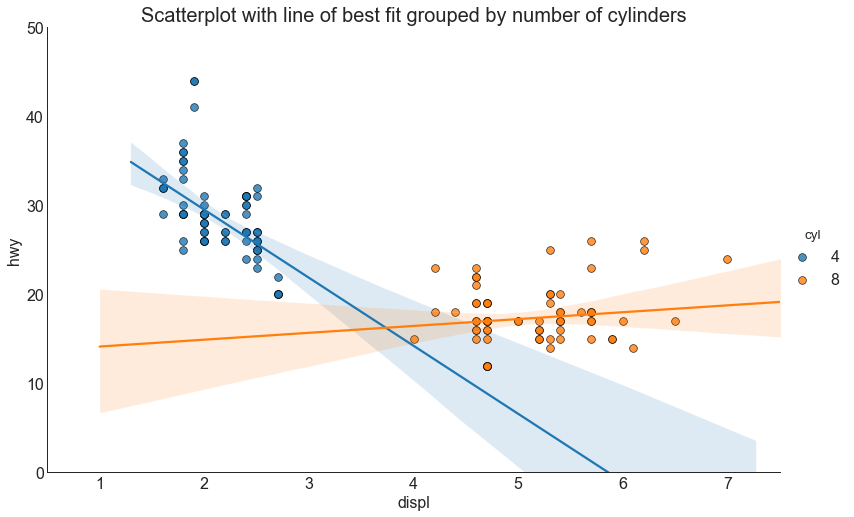

In [34]:
df_select = df.loc[df.cyl.isin([4,8]), :]

gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select,

                     height=7, aspect=1.6, robust=True, palette='tab10',

                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))



# Decorations

gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))

plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)

plt.show()

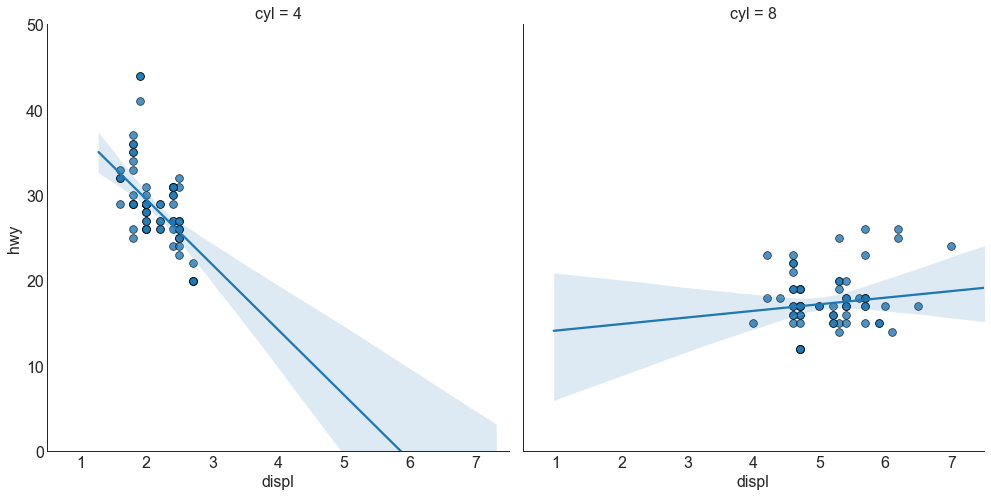

In [35]:
# Each line in its own column

gridobj = sns.lmplot(x="displ", y="hwy",

                     data=df_select,

                     height=7,

                     robust=True,

                     palette='Set1',

                     col="cyl",

                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))



# Decorations

gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))

plt.show()

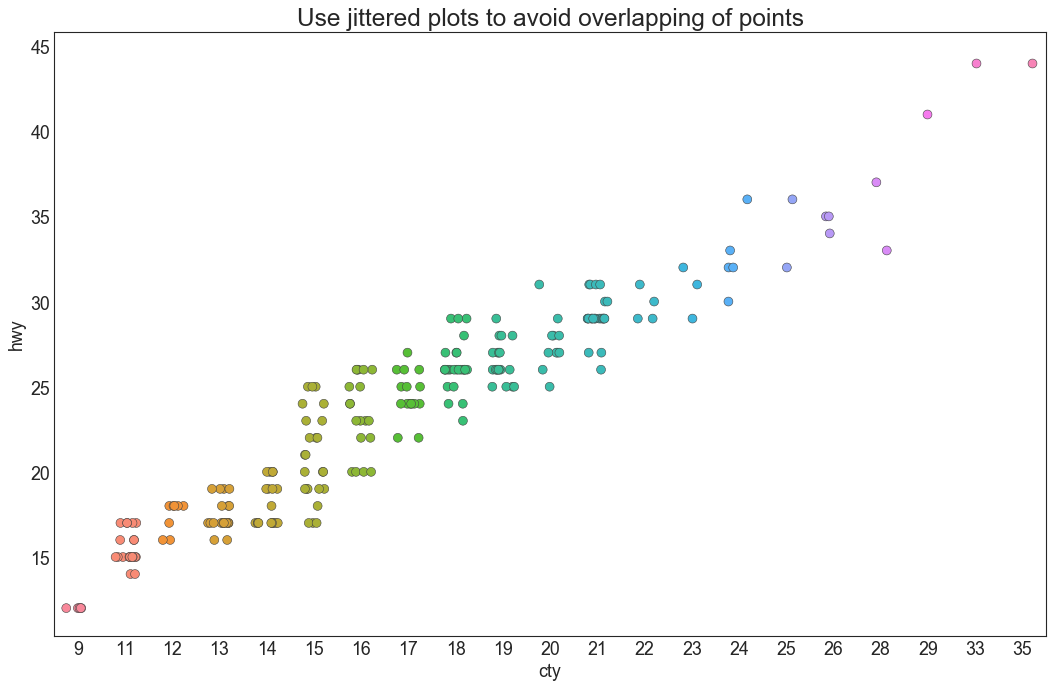

In [36]:
#Jittering with stripplot 
#多个数据拥有一样的xy值 需要稍微抖动下省得被覆盖

# Draw Stripplot

fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    

sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)



# Decorations

plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)

plt.show()

In [37]:
#计数图 Counts Plot：避免点重叠问题的另一个选择是增加点的大小，这取决于该点中有多少点。 因此，点的大小越大，其周围的点的集中度越高

df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')
df_counts.head()

,hwy,cty,counts
0,12,9,5
1,14,11,2
2,15,11,10
3,16,11,3
4,16,12,2


In [39]:
df_counts_test=df.groupby(['hwy', 'cty'])
df_counts_test.size()

hwy  cty
12   9       5
14   11      2
15   11     10
16   11      3
     12      2
     13      2
17   11      5
     12      1
     13     12
     14     10
     15      3
18   12      5
     13      3
     14      1
     15      1
19   13      4
     14      4
     15      5
20   14      4
     15      3
     16      4
21   15      2
22   15      3
     16      2
     17      2
23   15      2
     16      4
     18      1
24   15      2
     16      2
            ..
27   21      2
28   18      1
     19      3
     20      3
29   18      3
     19      1
     20      1
     21     14
     22      2
     23      1
30   21      2
     22      1
     24      1
31   20      1
     21      4
     22      1
     23      1
32   23      1
     24      2
     25      1
33   24      1
     28      1
34   26      1
35   26      2
36   24      1
     25      1
37   28      1
41   29      1
44   33      1
     35      1
Length: 78, dtype: int64

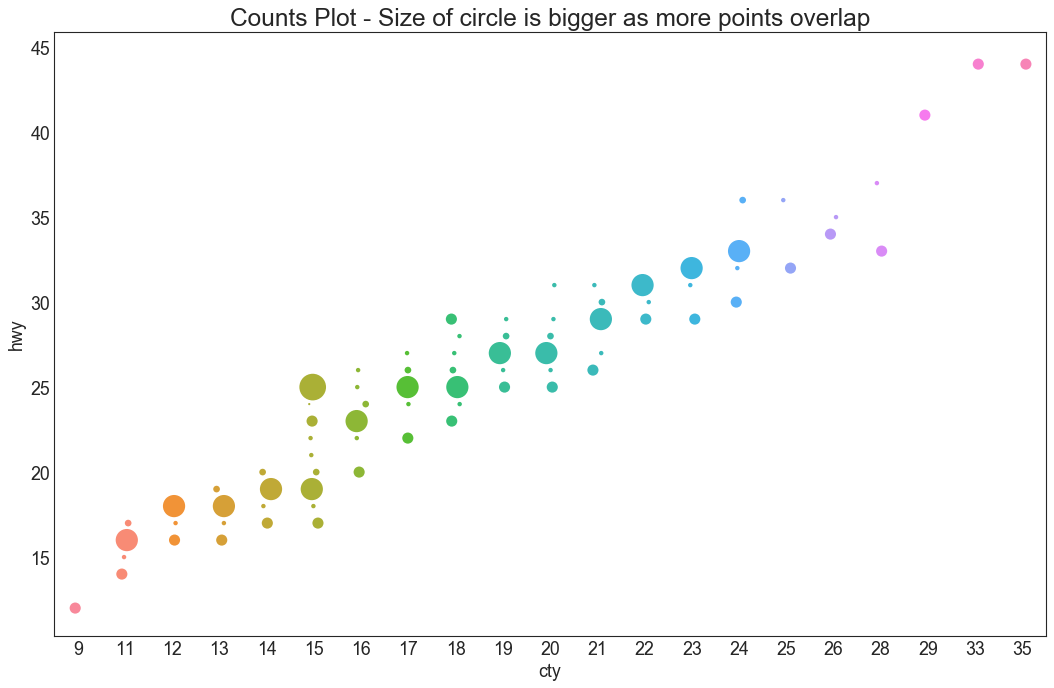

In [40]:
# Draw Stripplot

fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    

sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)



# Decorations

plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)

plt.show()

In [47]:
#loadDF = pds.read_csv('C:\Users\amao\Desktop\MLData\LCIS.csv') windows下会报错 因为\和转义符冲突
loadDF = pds.read_csv('LCIS.csv')

In [48]:
loadDF.head()

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,recorddate
0,1693100,3629,6,12.0,2015/1/28,AA,普通,否,31,男,...,0.00,0,已还清,2015/7/28,34.20,0.30,NaN,NaN,NaN,2016/12/31
1,1713229,3000,12,12.0,2015/1/30,AA,普通,是,24,男,...,0.00,0,已还清,2015/10/19,173.39,1.05,NaN,NaN,NaN,2016/12/31
2,1904026,3629,12,12.0,2015/3/7,AA,普通,否,27,男,...,0.00,0,已还清,2016/3/6,44.04,0.38,NaN,NaN,NaN,2016/12/31
3,2158281,3919,12,18.0,2015/4/14,C,普通,否,28,男,...,0.00,0,已还清,2015/5/19,92.34,0.22,NaN,NaN,NaN,2016/12/31
4,2257194,14000,12,18.0,2015/4/23,C,普通,否,46,男,...,9.92,589,逾期中,NaN,NaN,NaN,2015/5/23,7.66,1.5,2016/12/31


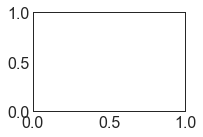

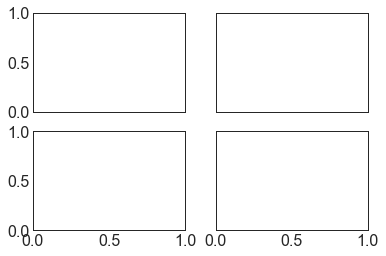

In [50]:
#创建画布
fig = plt.figure()
#创建subplot，221表示这是2行2列表格中的第1个图像。
ax1 = fig.add_subplot(221)
#但现在更习惯使用以下方法创建画布和图像，2,2表示这是一个2*2的画布，可以放置4个图像
fig , axes = plt.subplots(2,2,sharex=True,sharey=True)
#plt.subplot的sharex和sharey参数可以指定所有的subplot使用相同的x，y轴刻度。

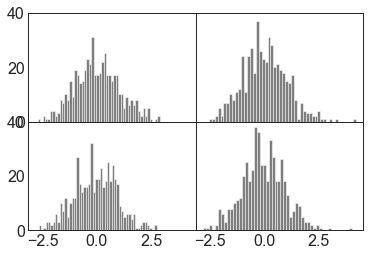

In [51]:
#利用Figure的subplots_adjust方法可以调整间距。 subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=None,hspace=None)
fig.subplots_adjust(wspace=0,hspace=0)#将间距调整为0
#举个栗子
fig , axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
fig.subplots_adjust(wspace=0,hspace=0)

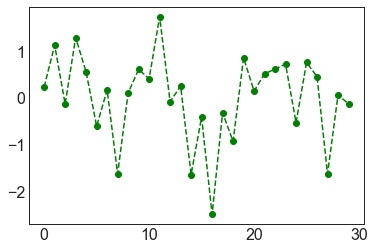

In [52]:
plt.plot(np.random.randn(30),color='g',linestyle='--',marker='o')

(-1.4500000000000002, 30.45)

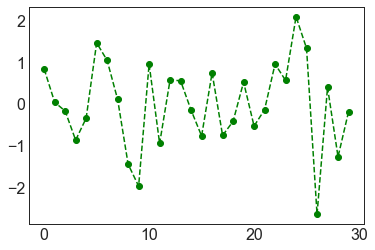

In [53]:
#plt的xlim、xticks和xtickslabels方法分别控制图表的范围和，刻度位置和刻度标签。
#调用方法时不带参数，则返回当前的参数值；调用时带参数，则设置参数值。
plt.plot(np.random.randn(30),color='g',linestyle='--',marker='o')
plt.xlim()   #不带参数调用，显示当前参数；
#可将xlim替换为另外两个方法试试

(0, 15)

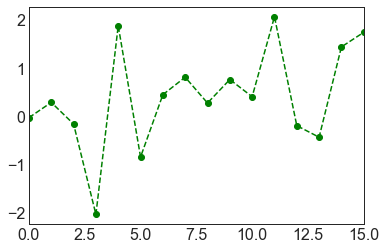

In [54]:
plt.plot(np.random.randn(30),color='g',linestyle='--',marker='o')
plt.xlim([0,15])    #横轴刻度变成0-15

Text(0.5, 0, 'Stage')

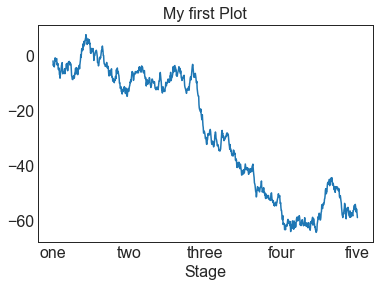

In [55]:
fig = plt.figure();ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])  #设置刻度值
labels = ax.set_xticklabels(['one','two','three','four','five'])  #设置刻度标签
ax.set_title('My first Plot')  #设置标题
ax.set_xlabel('Stage')  #设置轴标签

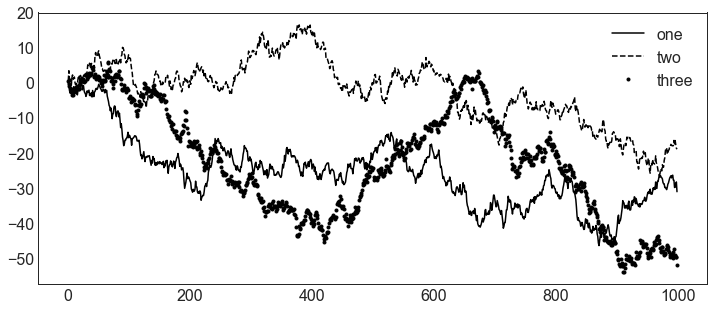

In [56]:
fig = plt.figure(figsize=(12,5));ax = fig.add_subplot(111)
ax.plot(np.random.randn(1000).cumsum(),'k',label='one')  #传入label参数，定义label名称
ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')
#图形创建完后，只需要调用legend参数将label调出来即可。
ax.legend(loc='best')  #要求不是很严格的话，建议使用loc=‘best’参数来让它自己选择最佳位置

Text(600, 10, 'amao ')

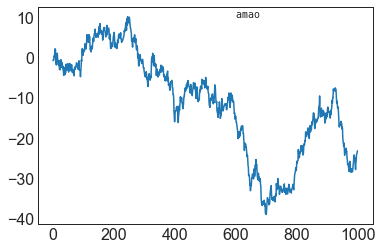

In [57]:
#除标准的图表对象之外，我们还可以自定义添加一些文字注解或者箭头。
#注解可以通过text，arrow和annotate等函数进行添加。 text函数可以将文本绘制在指定的x，y坐标位置，还可以进行自定义格式
plt.plot(np.random.randn(1000).cumsum())
plt.text(600,10,'amao ',family='monospace',fontsize=10) 
#中文注释在默认环境下并不能正常显示，需要修改配置文件，使其支持中文字体。具体步骤请自行搜索。

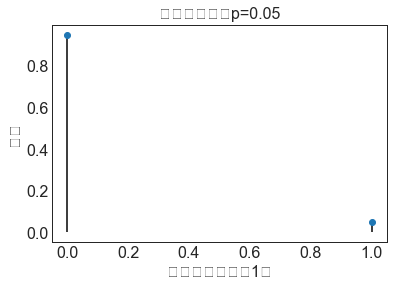

In [9]:
# 统计计算包的统计模块
import scipy.stats as stats
"""
第一步：定义随机变量：一次射箭
成功射中靶心记录为1，失败记录为0
"""
X = np.arange(0,2,1)

"""
第二步：求Bernoulli Distribution的概率：
概率质量函数（PMF）
p为射中的概率
"""
p=0.05
pList = stats.bernoulli.pmf(X ,p)
"""
第三步：绘制概率分布图
"""
plt.plot(X, pList, marker = 'o', linestyle= 'None')
#vlines用于绘制竖线(x坐标值, y坐标最小值, y坐标值最大值)
plt.vlines(X,0,pList)
#输入文本 中文暂时无法支持
plt.xlabel('随机变量：射箭1次')
plt.ylabel('概率')
plt.title('伯努利分布：p=%.2f' %  p)
#显示图形
plt.show()

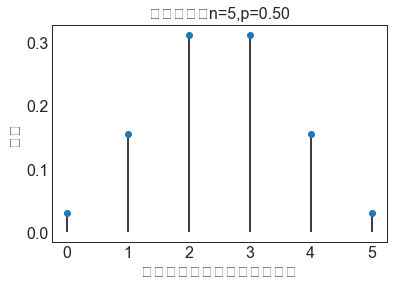

In [10]:
"""
第一步：定义随机变量：5次射箭中靶心的次数
"""
n=5  # 5次独立重复试验
p=0.5# 成功的概率（射中靶心的概率）
X=np.arange(0,n+1,1)
"""
第二步：求Binomial Distribution的概率：
概率质量函数（PMF）
"""
pList = stats.binom.pmf(X, n, p)

"""
第三步：绘制概率分布图
"""
plt.plot(X, pList, marker='o',linestyle='None')
plt.vlines(X, 0,pList)
plt.xlabel('随机变量：射箭中靶心的次数')
plt.ylabel('概率')
plt.title('二项分布：n=%i,p=%.2f' % (n,p))
plt.show()

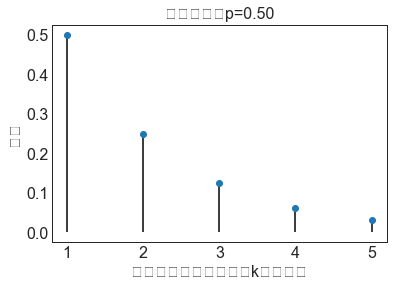

In [11]:
"""
第一步：定义随机变量：第k次才射箭中靶心
"""
# 我关心的是第5次才射中靶心的概率
k = 5
p = 0.5
X = np.arange(1,k+1,1)
"""
第二步：求Geometric Distribution的概率：
概率质量函数（PMF）
"""
pList = stats.geom.pmf(X,p)

"""
第三步：绘制概率分布图
"""
plt.plot(X, pList, marker='o',linestyle='None')
plt.vlines(X, 0,pList)
plt.xlabel('随机变量：射箭中靶心k次才成功')
plt.ylabel('概率')
plt.title('几何分布：p=%.2f' % p)
plt.show()

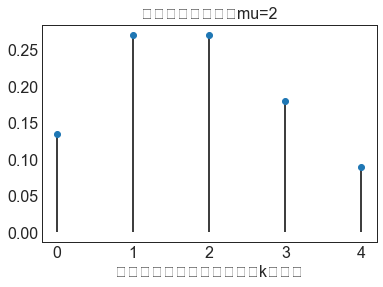

In [12]:
"""
泊松分布
第一步：定义随机变量：已知某工厂机器平均每周发生故障2次
那么该机器一周内发生k次故障的概率是多少？
"""
mu=2   #平均值
k=4    # 次数
X= np.arange(0,k+1,1)

"""
第二步：概率质量函数
"""
pList=stats.poisson.pmf(X,mu)

"""
第三步：绘图
"""
plt.plot(X,pList,marker='o',linestyle='None')
plt.vlines(X,0,pList)
plt.xlabel('随机变量：机器一周内发生k次故障')
plt.title('泊松分布：平均值mu=%i' % mu)
plt.show()

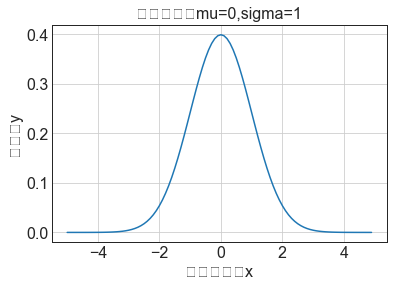

In [18]:
'''
正态概率分布
第1步，定义随机变量：
'''
mu=0 #平均值 决定顶点的位置 顶点的x坐标就是平均值
sigma= 1 #标准差 决定是宽还是窄 标准差小 分布窄 标准差大 分布宽
X = np.arange(-5, 5,0.1)
"""
第2步，概率密度函数（PDF）
"""
y=stats.norm.pdf(X,mu,sigma)
"""
第三步：绘图
"""
plt.plot(X, y)
plt.xlabel('随机变量：x')
plt.ylabel('概率：y')
plt.title('正态分布：mu=0,sigma=1' )
#网格
plt.grid()
plt.show()